```
Author Name : SYED LATEEFUDDIN  
SR Number   : 22412  
Program     : M.Tech - Artificial Intelligence
course      : E9 241 Digital Image Processing
DIP Assignment-2
```

### Import Libraries & Load Images

In [220]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy import ndimage
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [207]:
moon_noisy = io.imread('./data/moon_noisy.png')
flowers = io.imread('./data/flowers.png')
brightness_contrast = io.imread('./data/brightness_contrast.jpg')


## Question-1

**Spatial Filtering and Binarisation:**

In [40]:

def gaussian_filter(m, n, var):
    x, y = np.meshgrid(np.arange(-m, m+1), np.arange(-n, n+1), indexing='ij')
    gaussian_filter = np.exp(-(x**2 + y**2) / (2 * var))
    return gaussian_filter / gaussian_filter.sum()

def convolve(image_gray, filter):
    return ndimage.convolve(image_gray, filter)

def histogram(image_gray):
    histogram = np.zeros(256, int)
    for pixel_value in image_gray.ravel():
        histogram[pixel_value] += 1
    return histogram

def probability(m, n, hist):
    num_pixels = hist[m:n].sum()
    total_pixels = hist.sum()
    return num_pixels / total_pixels

def mean(m, n, hist):
    num_pixels = hist[m:n].sum()
    sum_intensity = (hist[m:n] * np.arange(m, n)).sum()
    return sum_intensity / num_pixels if num_pixels != 0 else 0

def variance(m, n, hist):
    mu = mean(m, n, hist)
    return (((np.arange(m, n) - mu)**2) * hist[m:n]).sum() / hist[m:n].sum() if hist[m:n].sum() != 0 else 0

def within_class_variance(image_gray, t):
    hist = histogram(image_gray)
    prob_black = probability(0, t+1, hist)
    prob_white = probability(t+1, 256, hist)
    var_black = variance(0, t+1, hist)
    var_white = variance(t+1, 256, hist)
    return (var_black * prob_black) + (var_white * prob_white)

def otsu_binarization(image_gray):
    within_class_var = np.array([within_class_variance(image_gray, i) for i in range(256)])
    threshold = within_class_var.argmin()
    binarized_image = (image_gray > threshold) * 255
    return binarized_image.astype(np.uint8), within_class_var[threshold]

def blur_image(image, var):
    if var == 0:
        return image
    gaussian_kernal = gaussian_filter(20, 20, var)
    blurred_image = np.stack([convolve(image[:, :, i], gaussian_kernal) for i in range(3)], axis=2)
    return blurred_image

def plot_within_class_var(image_gray):
    within_class_var = np.array([within_class_variance(image_gray, i) for i in range(256)])
    min_within_class_var = within_class_var.min()
    min_within_class_var_t = within_class_var.argmin()
    plt.plot(range(256), within_class_var, label='Within Class Variance')
    plt.scatter(min_within_class_var_t, min_within_class_var, color='red', label=f'Min Variance: {min_within_class_var:.2f} (Threshold: {min_within_class_var_t})')
    plt.annotate(f'Threshold: {min_within_class_var_t}', xy=(min_within_class_var_t, min_within_class_var), xytext=(min_within_class_var_t + 5, min_within_class_var + 0.02))
    plt.title('Within Class Variance vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Within Class Variance')
    plt.legend()

def plot_images(sigma, image_blurred, image_gray, binarized_image):
    hist = histogram(image_gray)
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    # Blurred image
    axs[0].imshow(image_blurred, cmap='gray')
    axs[0].set_title(f"Blurred Image (sigma = {sigma})")
    axs[0].axis('off')
    # Grayscale image
    axs[1].imshow(image_gray, cmap='gray')
    axs[1].set_title("Grayscale Image")
    axs[1].axis('off')
    # Histogram
    axs[2].plot(range(256), hist)
    axs[2].set_title("Histogram")
    axs[2].set_xlabel('Pixel Intensity (0-255)')
    axs[2].set_ylabel('Frequency')
    # Within-class variance plot
    plt.sca(axs[3])
    plot_within_class_var(image_gray)
    # Binarized image
    axs[4].imshow(binarized_image, cmap='gray')
    axs[4].set_title("Binarized Image (Otsu's)")
    axs[4].axis('off')
    plt.tight_layout()
    plt.show()
    
def spatial_filtering_and_binarisation(image):
    sigmas = np.array([0, 0.1, 0.5, 1, 2.5, 5, 10, 20])
    within_var_map = {}
    for sigma in sigmas:
        var = sigma**2
        image_blurred = blur_image(image, var)
        image_gray = (color.rgb2gray(image_blurred) * 255).astype(np.uint8)
        binarized_image, within_var = otsu_binarization(image_gray)
        within_var_map[sigma] = within_var
        plot_images(sigma, image_blurred, image_gray, binarized_image)
    sigmas = np.array(list(within_var_map.keys()))
    within_vars = np.array(list(within_var_map.values()))
    best_sigma_index = np.argmin(within_vars)
    best_sigma = sigmas[best_sigma_index]
    best_within_var = within_vars[best_sigma_index]
    plt.figure(figsize=(8, 5))
    plt.plot(sigmas, within_vars, label='Within Class Variance')
    plt.scatter(best_sigma, best_within_var, color='red', label=f'Best Sigma: {best_sigma:.2f} (min_within_class_var: {best_within_var:.2f})')
    plt.title('Sigma vs Within Class Variance')
    plt.xlabel('Sigma')
    plt.ylabel('Within Class Variance')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"\nThe Optimal sigma that minimizes within class variance is : {best_sigma:.1f}")
    
    
    

Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (300, 300, 3)
Maximum pixel value  : 255
Minimum pixel value  : 0


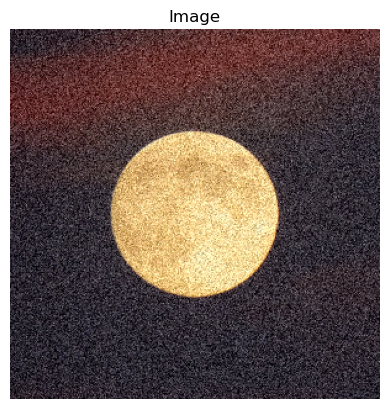

In [32]:
# Verify image information
image = moon_noisy

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

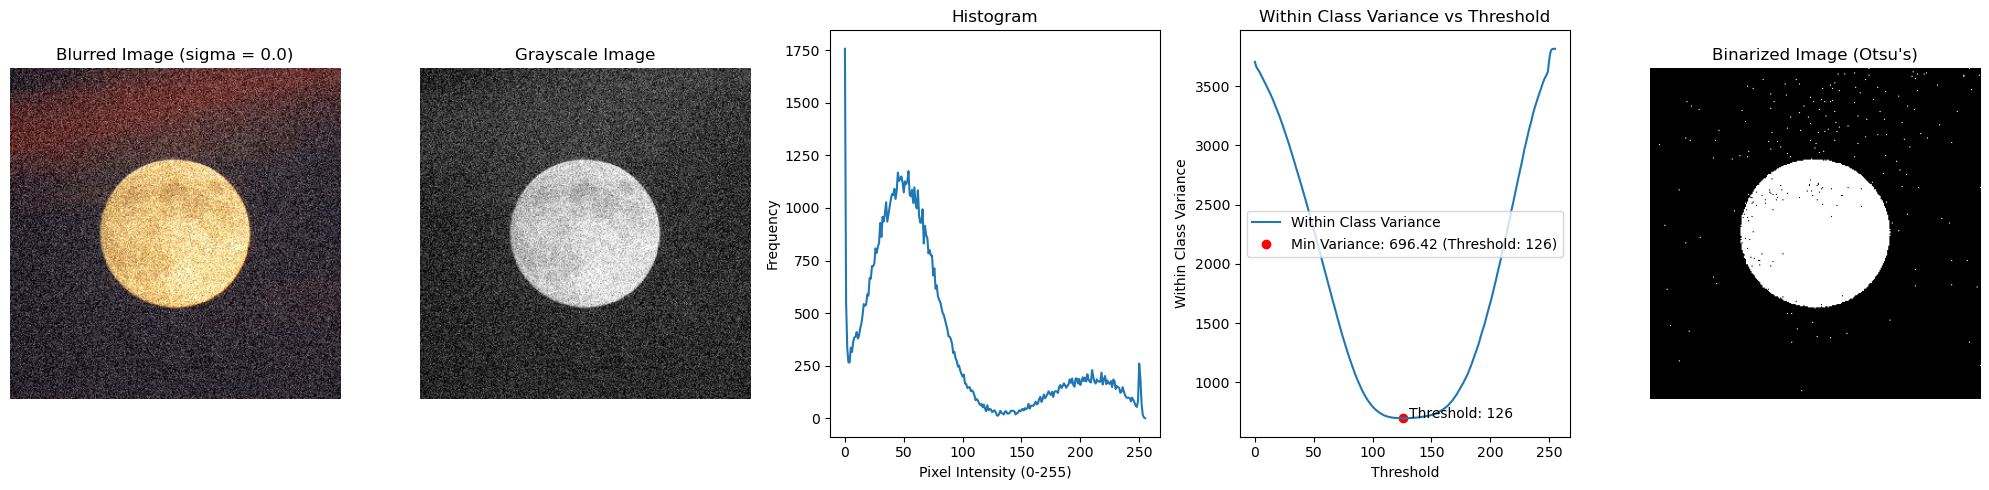

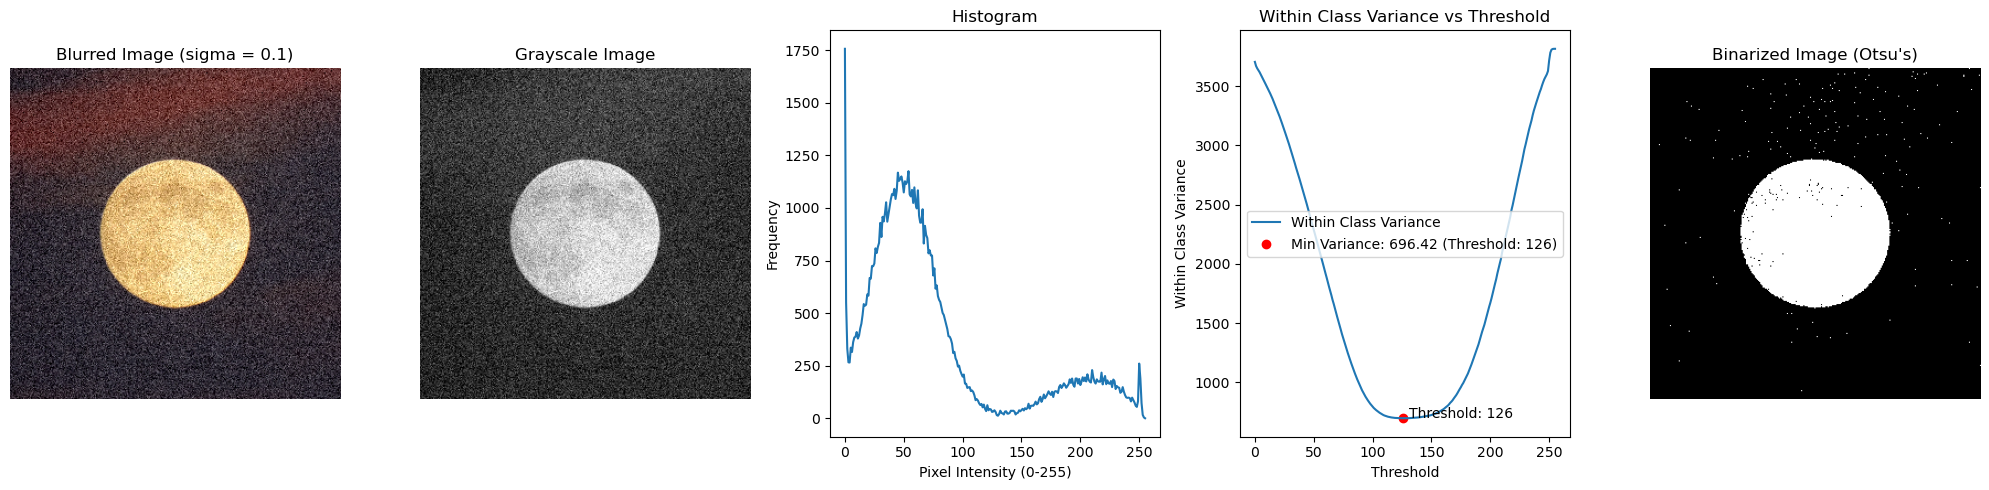

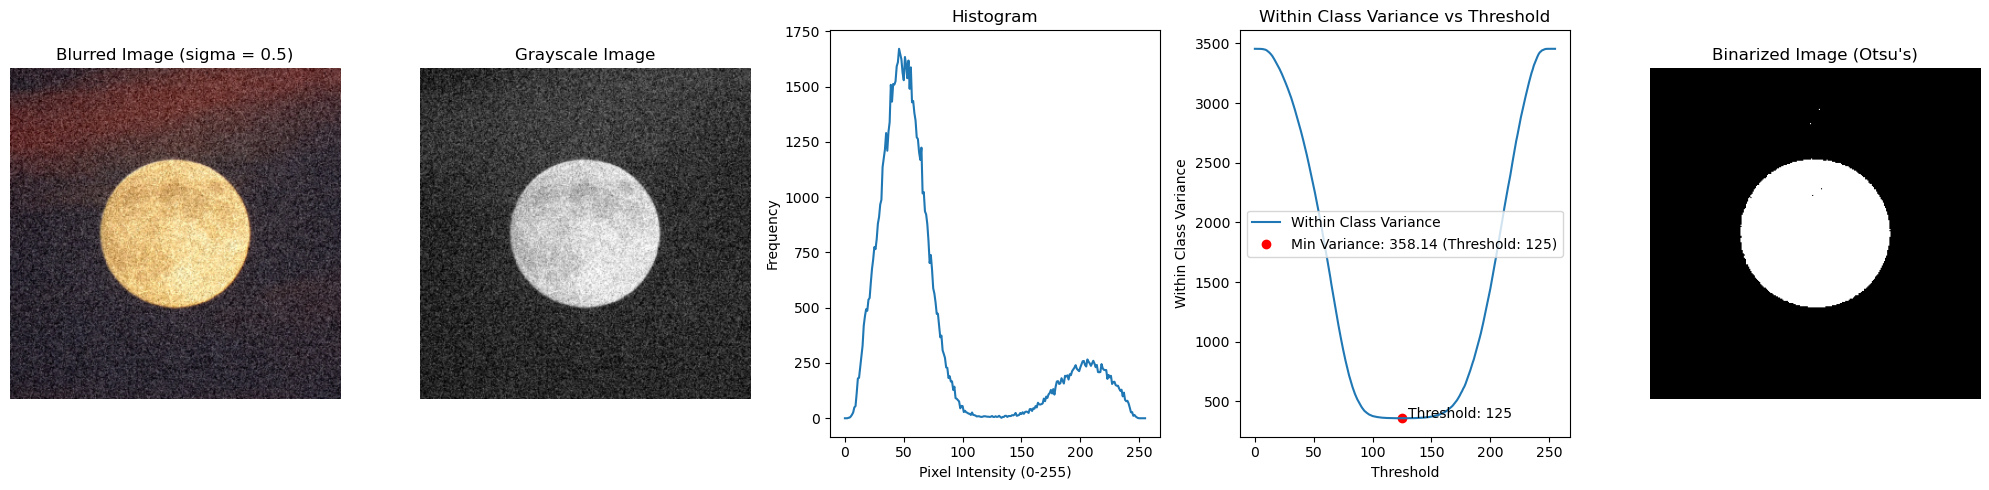

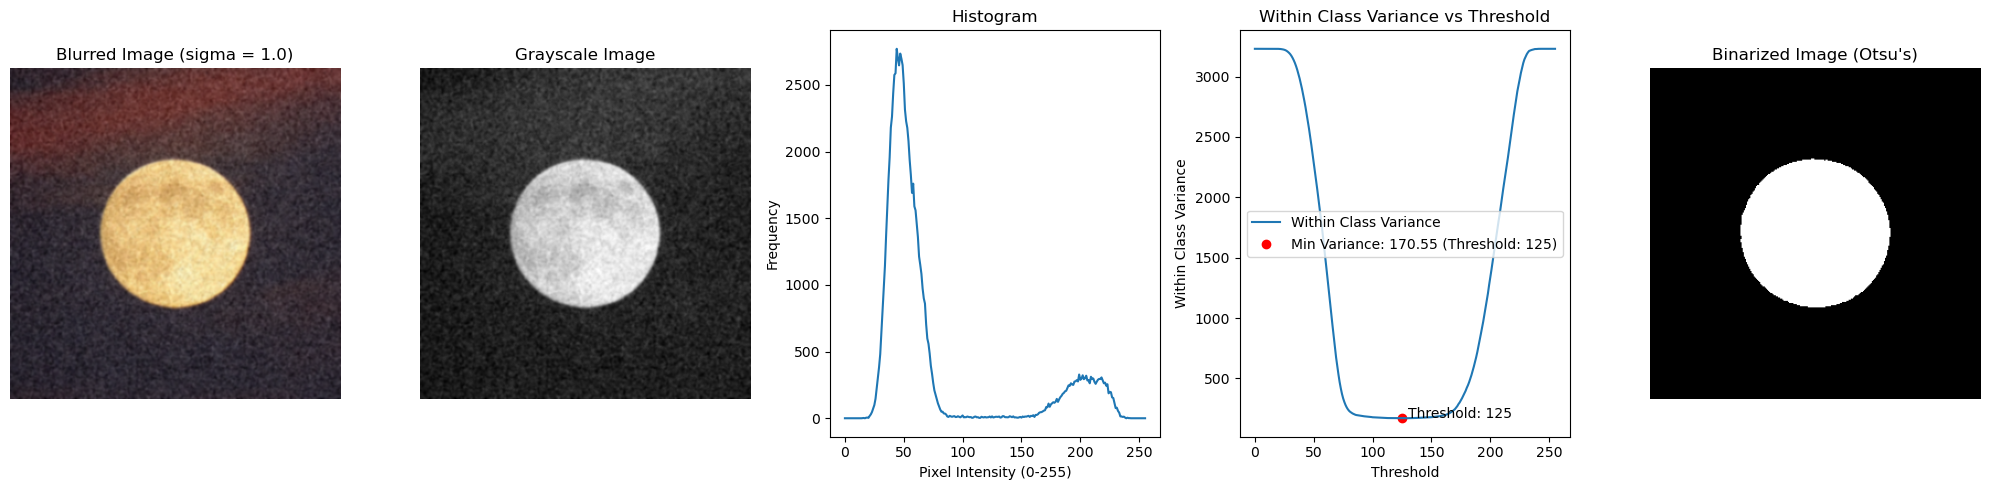

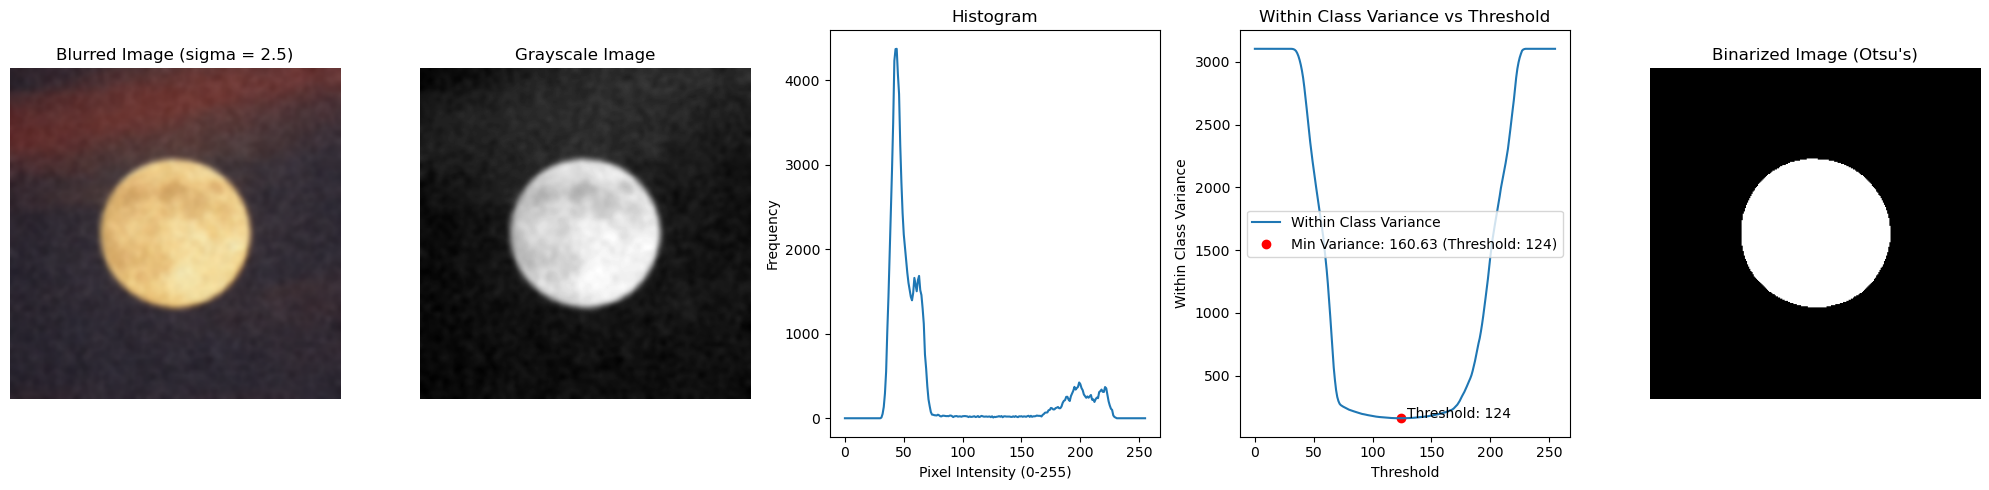

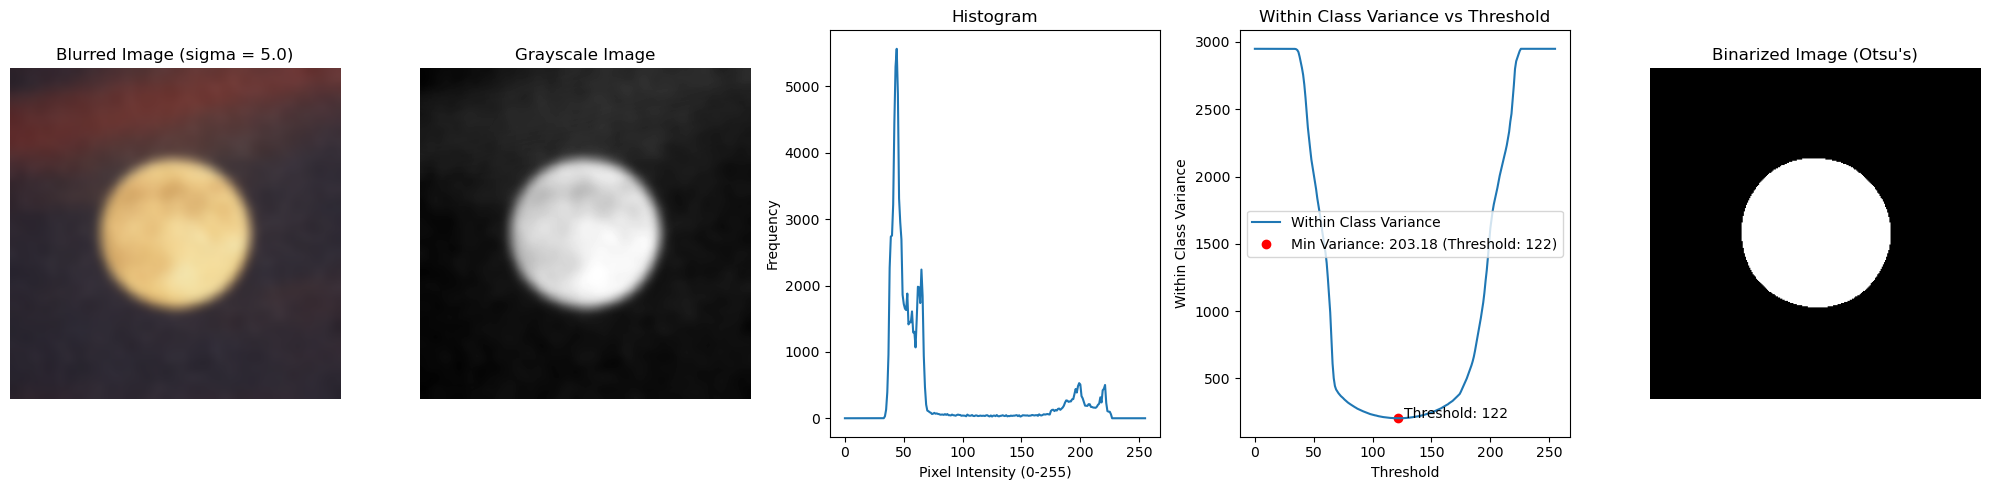

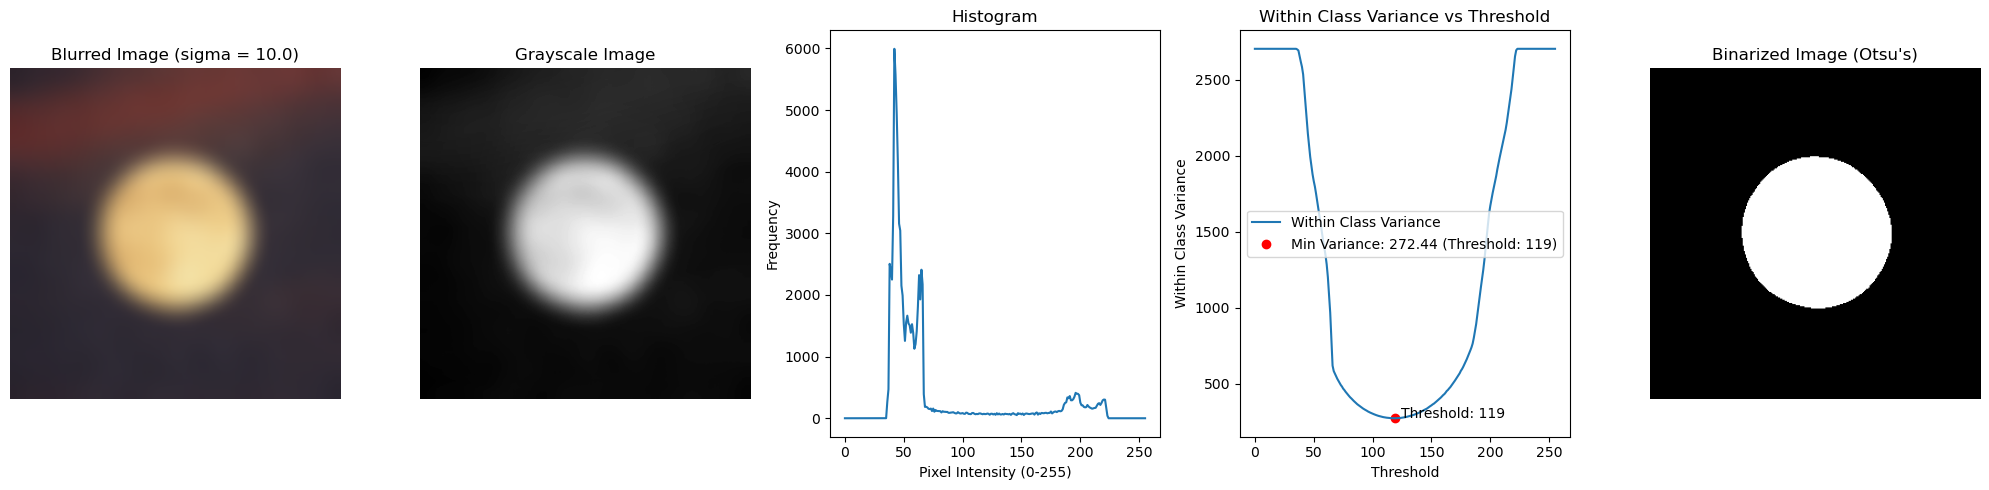

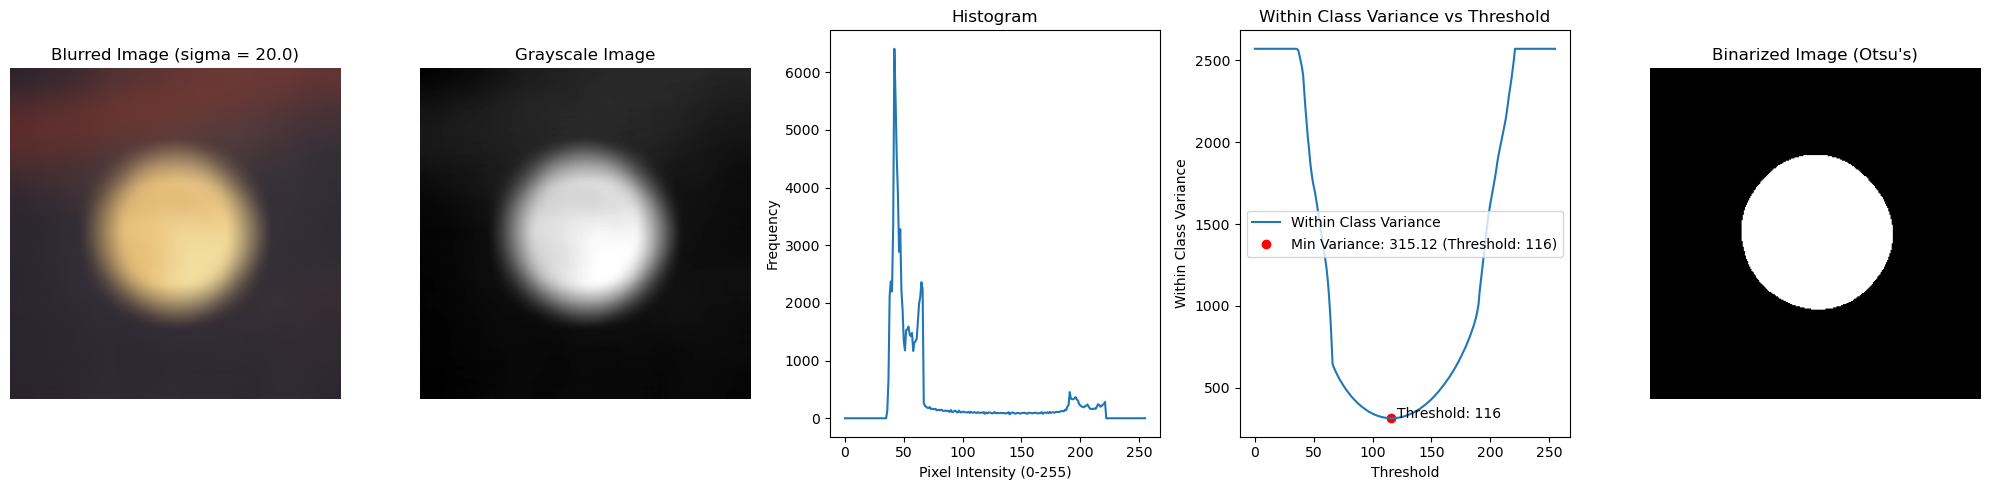

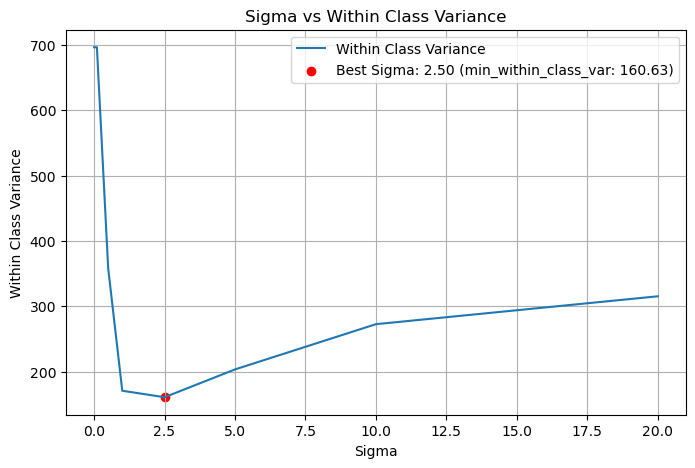


The Optimal sigma that minimizes within class variance is : 2.5


In [42]:
spatial_filtering_and_binarisation(image)


## Question-2

**Fractional Scaling with Interpolation:**

Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (227, 400)
Maximum pixel value  : 251
Minimum pixel value  : 8


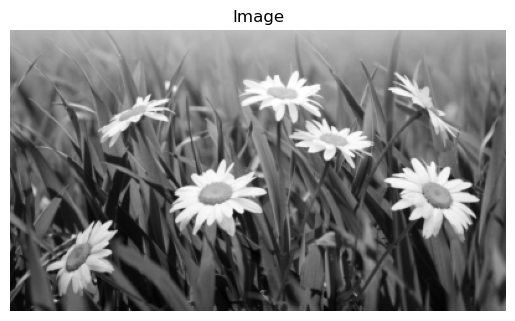

In [208]:
# Verify image information
image = flowers

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

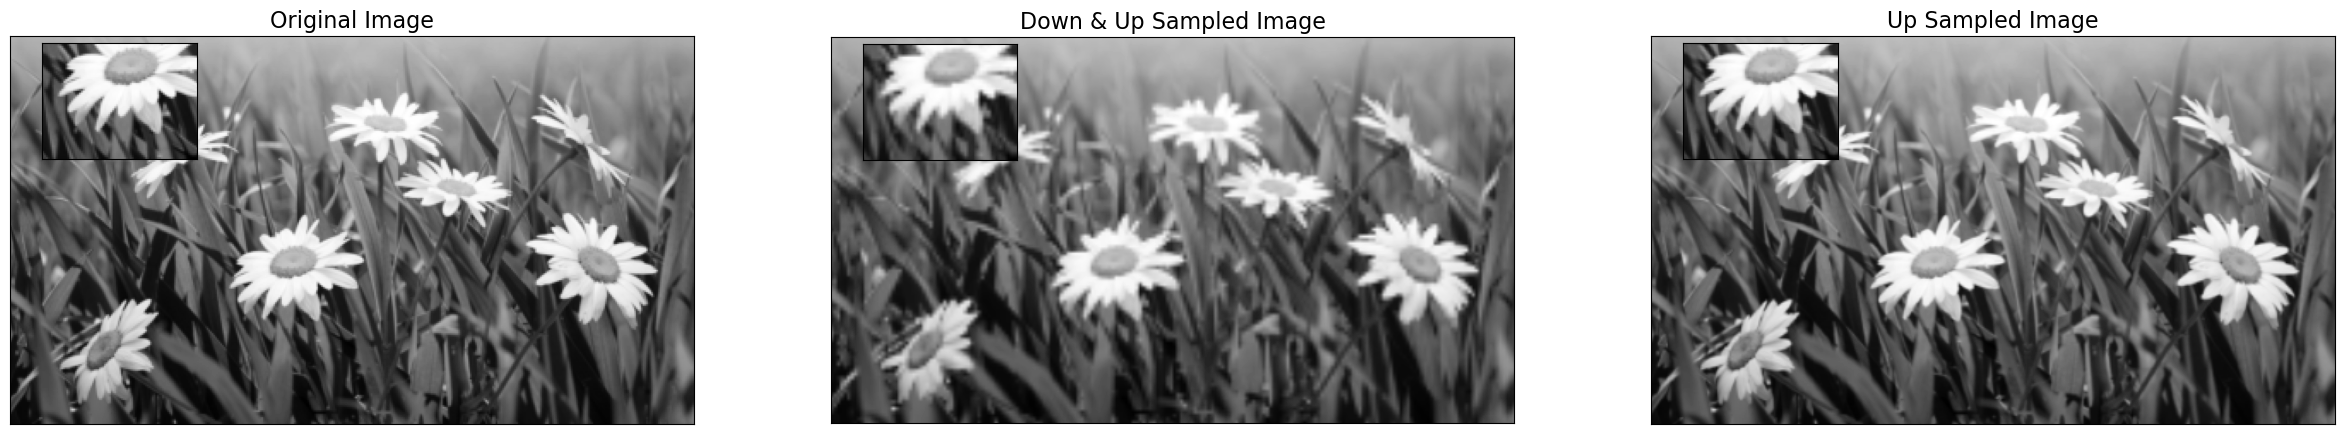

In [206]:
def bilinear_interpolation(m_grid, n_grid, image_gray):
    h, w = image_gray.shape
    a, b = np.floor(m_grid).astype(int), np.floor(n_grid).astype(int)
    a = np.clip(a, 0, h - 2)
    b = np.clip(b, 0, w - 2)
    I1 = image_gray[a, b]
    I2 = image_gray[a, b + 1]
    I3 = image_gray[a + 1, b + 1]
    I4 = image_gray[a + 1, b]
    p, q = m_grid - a, n_grid - b
    I = (1 - p) * (1 - q) * I1 + (1 - p) * (q) * I2 + (p) * (q) * I3 + (p) * (1 - q) * I4
    return I

def down_sample(image_gray, factor):
    h, w = image_gray.shape
    new_h, new_w = int(h // factor), int(w // factor)
    x = np.linspace(0, h - 1, new_h)
    y = np.linspace(0, w - 1, new_w)
    x_grid, y_grid = np.meshgrid(x, y, indexing='ij')
    downsampled_img = bilinear_interpolation(x_grid, y_grid, image_gray)
    return downsampled_img.astype(np.uint8)

def up_sample(image_gray, factor):
    h, w = image_gray.shape
    new_h, new_w = int(h * factor), int(w * factor)
    x = np.linspace(0, h - 1, new_h)
    y = np.linspace(0, w - 1, new_w)
    x_grid, y_grid = np.meshgrid(x, y, indexing='ij')
    upsampled_img = bilinear_interpolation(x_grid, y_grid, image_gray)
    return upsampled_img.astype(np.uint8)

def plot_with_zoom_patch(ax, image, title='image', zoom_region=(50, 100, 50, 100)):
    # Plot the image on the provided axis
    ax.imshow(image, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{title}", fontsize=16)
    # Create the inset with zoomed region
    inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
    x1, x2, y1, y2 = zoom_region
    zoomed_img = image[x1:x2, y1:y2]
    inset_ax.imshow(zoomed_img, cmap="gray")
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

image = flowers
down_and_up_sampling = up_sample(down_sample(image,2),3)
up_sampling = up_sample(image,3/2)


fig, axs = plt.subplots(1, 3, figsize=(30, 10)) 
plot_with_zoom_patch(axs[0], image, title='Original Image', zoom_region=(120, 180, 120, 200))
plot_with_zoom_patch(axs[1], down_and_up_sampling, title='Down & Up Sampled Image', zoom_region=(180, 270, 180, 300))
plot_with_zoom_patch(axs[2], up_sampling, title='Up Sampled Image', zoom_region=(180, 270, 180, 300))
plt.show()



## Question-3

**Photoshop Feature:**

Image type           : <class 'numpy.ndarray'>
Pixel value data type: uint8
Image shape          : (1280, 1920, 3)
Maximum pixel value  : 255
Minimum pixel value  : 0


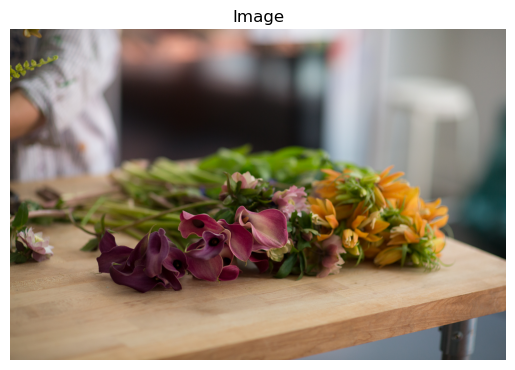

In [209]:
# Verify image information
image = brightness_contrast

print(f"Image type           : {type(image)}")
print(f"Pixel value data type: {image.dtype}")
print(f"Image shape          : {image.shape}")
print(f"Maximum pixel value  : {np.max(image)}")
print(f"Minimum pixel value  : {np.min(image)}")

plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')
plt.show()

Brightness Adjustments:


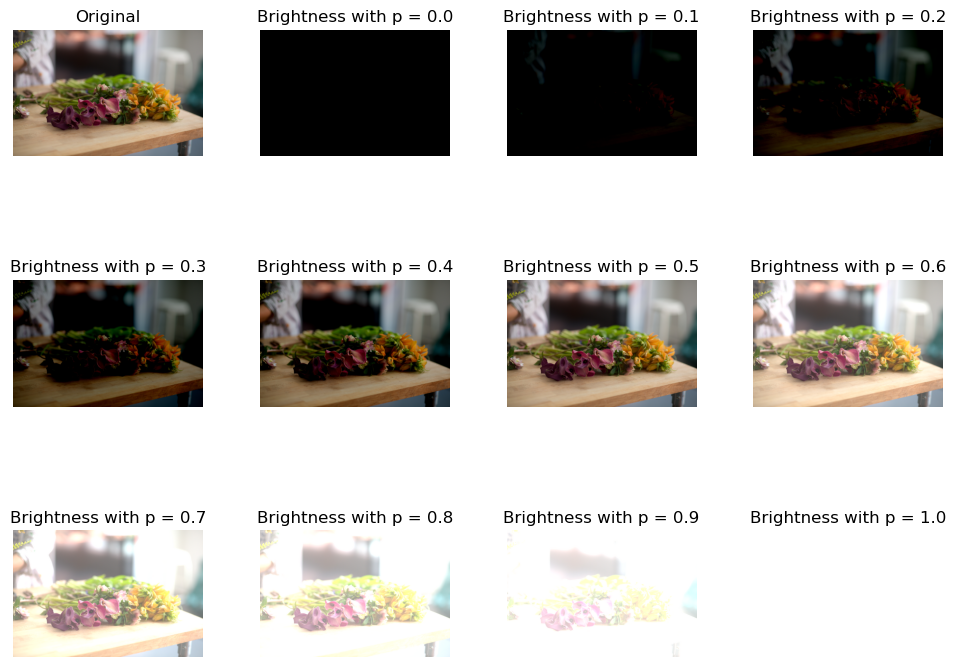

Contrast Adjustments:


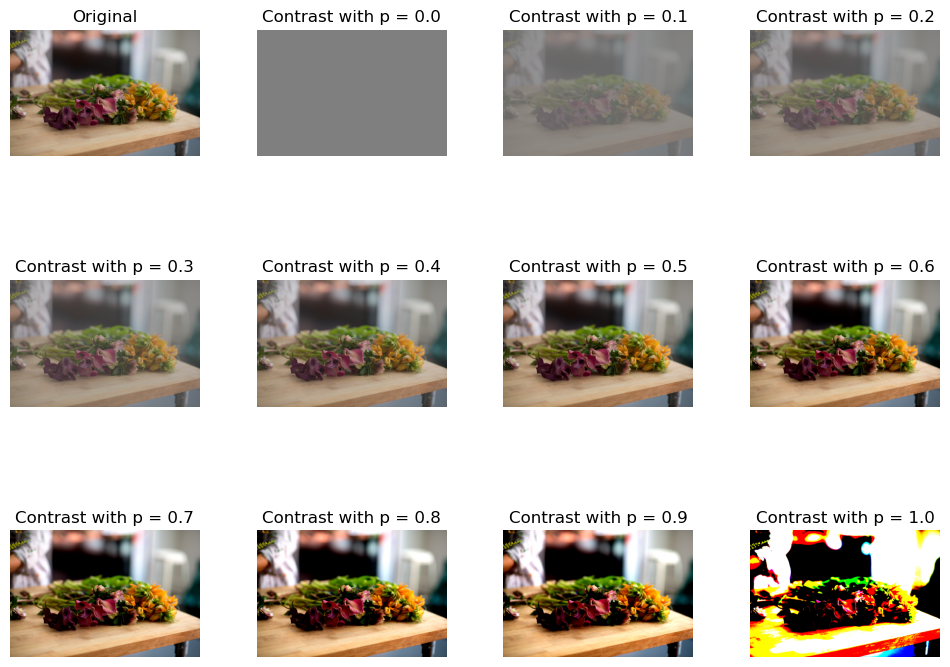

In [221]:

def brightnessAdjust(img, p):
    if p >= 0.5:
        req_brightness = ((p - 0.5)/0.5) * (255 - np.min(img))
        return np.clip(img + req_brightness, 0, 255)
    else:
        req_darkness = ((0.5 - p)/0.5) * np.max(img)
        return np.clip(img - req_darkness, 0, 255)
    
def contrastAdjust(img, p):
    img = img / 255.0
    if p == 0:
        return np.full_like(img, 0.5) * 255
    elif p == 1:
        return np.where(img >= 0.5, 1, 0) * 255
    else:
        img_adjusted = (2*p) * img - p + 0.5
    img_adjusted = np.clip(img_adjusted, 0, 1) * 255
    return img_adjusted.astype(np.uint8)


def plot_images(original_image, adjusted_images, title_prefix="Adjusted"):
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    axes[0, 0].imshow(original_image, cmap='gray')
    axes[0, 0].set_title("Original")
    axes[0, 0].axis('off')
    for i, ax in enumerate(axes.flat[1:]):
        ax.imshow(adjusted_images[i], cmap='gray')
        ax.set_title(f"{title_prefix} with p = {np.round(0.1 * i, 2)}")
        ax.axis('off')
    plt.show()

def apply_adjustments(image, adjustment_func):
    variations = []
    for p in np.linspace(0, 1, 11):
        adjusted_channels = [adjustment_func(image[:, :, i], p) for i in range(3)]
        adjusted_image = np.stack(tuple(adjusted_channels), axis=2).astype(int)
        variations.append(adjusted_image)
    return variations


image = brightness_contrast

# Apply brightness and contrast adjustments
brightness_variations = apply_adjustments(image, brightnessAdjust)
contrast_variations = apply_adjustments(image, contrastAdjust)

# Plot the results
print("Brightness Adjustments:")
plot_images(image, brightness_variations, title_prefix="Brightness")

print("Contrast Adjustments:")
plot_images(image, contrast_variations, title_prefix="Contrast")
